# Завдання 1
Протягом 50 років вимірювався рівень води навесні під час повені відносно умовного нуля. Результати вимірювання наведено у вигляді інтервального статистичного розподілу:

| **x_i** | 0-24 | 24-48 | 48-72 | 72-96 | 96-120 | 120-144 | 144-168 | 168-192 | 192-216 |
|:-------:|:----:|:-----:|:-----:|:-----:|:------:|:-------:|:-------:|:-------:|:-------:|
| **n_i** |   1  |   2   |   4   |   6   |   12   |    16   |    6    |    2    |    1    |

За заданими статистичними розподілами вибірки висунути $H_0$ про закон розподілу ознаки генеральної сукупності і при рівні значущості $\alpha = 0.01$ перевірити її правильність.

## Рішення
1. Розрахуємо статистики:

In [224]:
import numpy as np

x_i = [[0, 24], [24, 48], [48, 72], [72, 96], [96, 120], [120, 144], [144, 168], [168, 192], [192, 216]]
x = np.array([(item[1] + item[0])/2 for item in x_i])
n = np.array([1, 2, 4, 6, 12, 16, 6, 2, 1])

mean_x = sum(x * n / sum(n))
var_x = sum(n*(x - mean_x)**2/(sum(n)-1))
sd_x = var_x ** (1/2)

print(f'Середнє значення = {mean_x}\n'
      f'Дисперсія = {round(var_x, 2)}\n'
      f'Стандартне відхилення = {round(sd_x, 2)}')

Середнє значення = 114.72
Дисперсія = 1482.08
Стандартне відхилення = 38.5


2. Побудуємо гістограму:

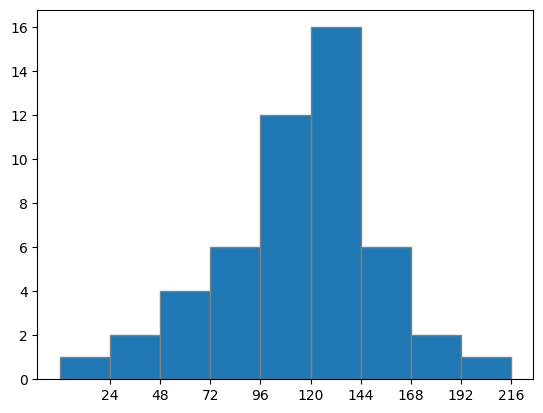

Можна висунути гіпотезу про нормальність розподілу вибірки.


In [225]:
import matplotlib.pyplot as plt

plt.bar(x, n, width=24, edgecolor='gray')
plt.xticks(x+12)
plt.show()

print('Можна висунути гіпотезу про нормальність розподілу вибірки.')

3. Перевіримо гіпотезу за критерієм узгодженості Пірсона:

In [226]:
import pandas as pd
import scipy as sp
from IPython.display import Markdown as md
from IPython.display import display

data = pd.DataFrame({'x_lower': [item[0] for item in x_i],
                     'x_upper': [item[1] for item in x_i],
                     'n': n})

# Нижня межа Z-значення
data['Z_upper'] = (data['x_upper'] - mean_x) / sd_x

# Верхня межа Z-значення
data['Z_lower'] = data['Z_upper'].shift(1)

# Зміна позиції стовпчика
data = data.iloc[:, [0, 1, 2, 4, 3]]

# Форматування безконечності
data.iloc[0, 3] = -np.inf
data.iloc[8, 4] = np.inf

# Нижня межа F-значення
data['F_lower'] = [sp.stats.norm.cdf(data.loc[i, 'Z_lower']) - 0.5 for i in range(len(data['Z_lower']))]

# Верхня межа F-значення
data['F_upper'] = data['F_lower'].shift(-1)

# Корегування значення
data.iloc[8, 6] = 0.5

# Розрахунок P-значення
data['P'] = data['F_upper'] - data['F_lower']

# Розрахунок теоретичної частоти
data['N'] = data['P']*sum(data['n'])

# Критерії узгодженості
data['K'] = (data['n'] - data['N'])**2 / data['N']

# Демонстрація таблиці
display(data)

# Критерій узгодженості Пірсона
K = sum(data['K'])

# Табличне значення Хі-квадрат
Chi2 = sp.stats.chi2.ppf(0.99, len(x)-2-1)

# Висновок
md(f'Відповідь: оскільки  критичне значення $K_к(${round(Chi2, 2)}) >  $K_e(${round(K, 2)}) ми не маємо підстав відхилити гіпотезу $H_0$ про нормальність розподілу вибірки.')

,x_lower,x_upper,n,Z_lower,Z_upper,F_lower,F_upper,P,N,K
0,0,24,1,-inf,-2.356496,-0.500000,-0.490776,0.009224,0.461206,0.629433
1,24,48,2,-2.356496,-1.733084,-0.490776,-0.458460,0.032316,1.615810,0.091349
2,48,72,4,-1.733084,-1.109673,-0.458460,-0.366430,0.092030,4.601485,0.078623
3,72,96,6,-1.109673,-0.486261,-0.366430,-0.186609,0.179821,8.991050,0.995032
4,96,120,12,-0.486261,0.137151,-0.186609,0.054544,0.241153,12.057654,0.000276
5,120,144,16,0.137151,0.760562,0.054544,0.276541,0.221997,11.099830,2.163246
6,144,168,6,0.760562,1.383974,0.276541,0.416817,0.140276,7.013803,0.146539
7,168,192,2,1.383974,2.007386,0.416817,0.477646,0.060829,3.041445,0.356610
8,192,216,1,2.007386,inf,0.477646,0.500000,0.022354,1.117715,0.012398


Відповідь: оскільки  критичне значення $K_к($16.81) >  $K_e($4.47) ми не маємо підстав відхилити гіпотезу $H_0$ про нормальність розподілу вибірки.

4. Критерій Шапіро-Вілка:

In [227]:
# Генеруємо значення
x_rep = np.repeat(x, n, axis=0)

# Критерій Шапіро-Вілка
W, p_value = sp.stats.shapiro(x_rep)

print(f'З вихідних значень p-значення({round(p_value,2)}) < 0.05. Це означає, що розподіл даних відрізняється від нормального розподілу.')

З вихідних значень p-значення(0.03) < 0.05. Це означає, що розподіл даних відрізняється від нормального розподілу.


5. Наближений метод:

In [228]:
np.random.seed(1234)

# Додаємо випадкового шуму до даних
W, p_value = sp.stats.shapiro(x_rep + np.random.uniform(low=-2.5, high=2.5, size=sum(n)))

print(f'З вихідних значень p-значення({round(p_value,2)}) > 0.05. Це означає, що розподіл даних не відрізняється від нормального розподілу.')

З вихідних значень p-значення(0.08) > 0.05. Це означає, що розподіл даних не відрізняється від нормального розподілу.


6. QQ-plot:

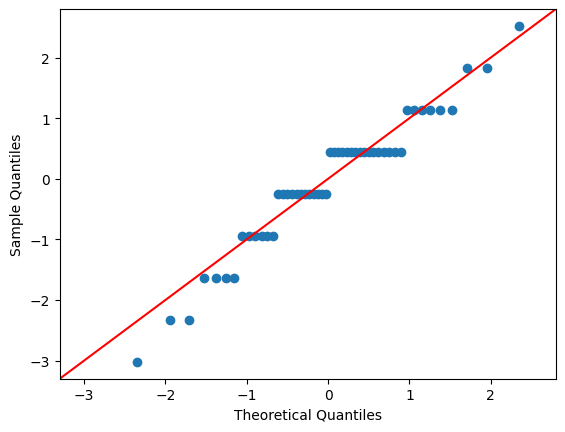

In [229]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats

sm.qqplot(x_rep, stats.t, fit=True, line="45")
plt.show()